In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv(r'E:\CoffeeCoders-EasyFundBuddy\datasets\new_loan.csv')
data.head(n=10)

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,nmi_emi_Ratio
0,37,44000,539,employed,high school,13,28714,60,married,3,...,0.946450,8,301790,0.264214,0.244174,833.014273,0.351822,0,46.0,0.227186
1,50,22787,627,employed,high school,25,20061,60,married,0,...,0.799385,8,2918,0.211561,0.187447,517.579630,0.445296,0,51.0,0.272566
2,48,15248,515,employed,high school,27,19403,36,married,0,...,0.887381,4,5376,0.246903,0.205161,726.197838,0.738351,0,57.0,0.571509
3,40,81906,456,employed,high school,18,78598,36,married,0,...,0.825630,4,60459,0.335598,0.355746,3581.071272,0.590150,0,54.0,0.524661
4,31,33605,558,employed,high school,9,26551,36,married,5,...,0.757579,8,448172,0.232551,0.206345,995.334603,0.501831,0,47.0,0.355424
5,26,96075,581,employed,high school,4,38708,36,married,1,...,0.693569,6,31084,0.233208,0.235104,1508.693352,0.300852,0,57.0,0.188439
6,38,49493,639,employed,high school,18,31671,72,married,1,...,0.713055,3,214962,0.227171,0.211416,779.711870,0.292093,0,51.0,0.189048
7,37,18182,583,employed,high school,18,21201,72,married,2,...,0.675029,6,4572,0.244701,0.265880,591.925874,0.761583,0,60.0,0.390667
8,52,70016,574,employed,high school,30,20323,120,married,2,...,0.639601,8,32725,0.288323,0.286620,515.776625,0.162782,0,49.0,0.088399
9,48,70326,635,employed,high school,29,9182,24,married,2,...,0.456379,3,4613,0.166682,0.200018,467.333513,0.216250,0,53.0,0.079743


# PreProcessing Starts

In [ ]:
data = data.drop(['nmi_emi_Ratio'], axis=1)

# Handle Dataset Imbalance

# Separate features and target
X = data.drop('LoanApproved', axis=1)  # replace 'target_column' with the actual target column name
y = data['LoanApproved']


# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=4)
X, y = rus.fit_resample(X, y)

# Add the target column back to the DataFrame
X['LoanApproved'] = y

X.to_csv(r'datasets/preprocessed_loan.csv', index=False)


In [10]:
df = pd.read_csv(r'datasets/preprocessed_loan.csv')

# Encoding categorical data
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [15]:
# save the label encoders for future use
joblib.dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']

In [11]:
# Separate features and target and remove unwanted columns
X = data.drop(['LoanApproved', 'RiskScore', 'TotalAssets', 'TotalLiabilities'], axis=1)
y = data['LoanApproved']

In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Enigneering

In [16]:

X['TotalIncome'] = X['AnnualIncome'] + X['SavingsAccountBalance'] + X['CheckingAccountBalance']
X['DebtRatio'] = X['MonthlyDebtPayments'] / (X['MonthlyIncome'] + 1e-5)  # Avoid division by zero
X['CreditScore_Income'] = X['CreditScore'] * X['AnnualIncome']
X['DebtToIncome_CreditScore'] = X['DebtToIncomeRatio'] * X['CreditScore']
X['InterestRate_LoanDuration'] = X['InterestRate'] * X['LoanDuration'] #Interaction with Interest Rate

# Update scaled features after adding new features
X_scaled = scaler.fit_transform(X)

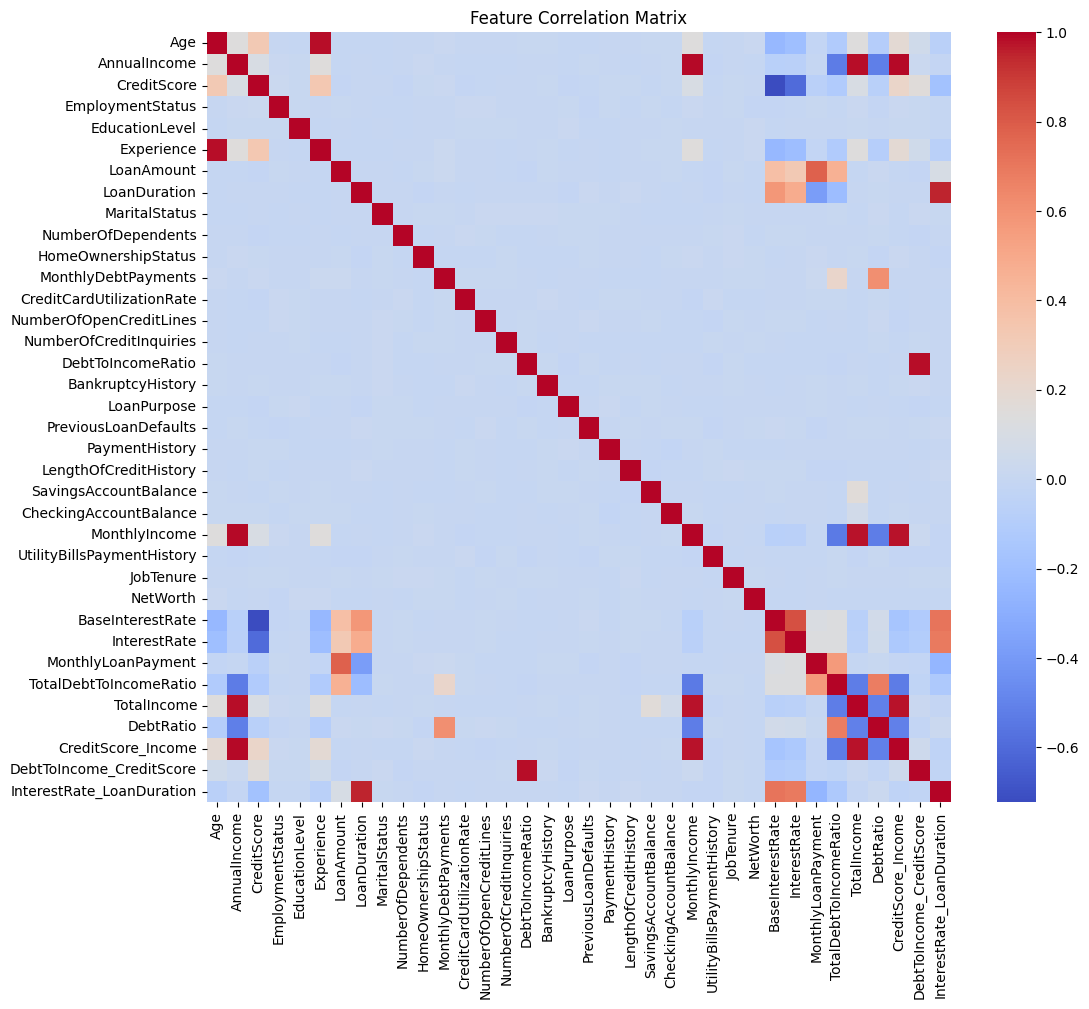

In [19]:
# correlation matrix
correlation_matrix = X.corr()

# plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [20]:
X.head(n=10)

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,TotalIncome,DebtRatio,CreditScore_Income,DebtToIncome_CreditScore,InterestRate_LoanDuration
0,37,44000,539,0,3,13,28714,60,1,3,...,301790,0.264214,0.244174,833.014273,0.351822,52811,0.124636,23716000,107.796816,14.650425
1,50,22787,627,0,3,25,20061,60,1,0,...,2918,0.211561,0.187447,517.579630,0.445296,28623,0.172730,14287449,136.610829,11.246834
2,48,15248,515,0,3,27,19403,36,1,0,...,5376,0.246903,0.205161,726.197838,0.738351,19385,0.166842,7852720,234.377998,7.385809
3,40,81906,456,0,3,18,78598,36,1,0,...,60459,0.335598,0.355746,3581.071272,0.590150,86667,0.065490,37349136,209.629123,12.806873
4,31,33605,558,0,3,9,26551,36,1,5,...,448172,0.232551,0.206345,995.334603,0.501831,47332,0.146407,18751590,166.523580,7.428409
5,26,96075,581,0,3,4,38708,36,1,1,...,31084,0.233208,0.235104,1508.693352,0.300852,122679,0.112412,55819575,301.497421,8.463758
6,38,49493,639,0,3,18,31671,72,1,1,...,214962,0.227171,0.211416,779.711870,0.292093,52629,0.103045,31626027,234.954839,15.221919
7,37,18182,583,0,3,18,21201,72,1,2,...,4572,0.244701,0.265880,591.925874,0.761583,23393,0.370916,10600106,313.068736,19.143337
8,52,70016,574,0,3,30,20323,120,1,2,...,32725,0.288323,0.286620,515.776625,0.162782,71863,0.074383,40189184,108.432158,34.394443
9,48,70326,635,0,3,29,9182,24,1,2,...,4613,0.166682,0.200018,467.333513,0.216250,71463,0.136507,44657010,255.124184,4.800442


## Using RandomForestClassifier to check influence of each feature 

In [25]:

# loop to find the best value of random_state for splitting the data
max_accuracy = 0
best_random_state = 0
for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)
    rf_model = RandomForestClassifier(random_state=i)
    rf_model.fit(X_train, y_train)  # Train on resampled training data
    rf_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, rf_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_random_state = i

                       Feature  Importance
30      TotalDebtToIncomeRatio    0.150738
23               MonthlyIncome    0.101145
33          CreditScore_Income    0.093229
31                 TotalIncome    0.073667
28                InterestRate    0.070737
1                 AnnualIncome    0.069788
26                    NetWorth    0.055763
6                   LoanAmount    0.044248
32                   DebtRatio    0.038877
35   InterestRate_LoanDuration    0.035936
29          MonthlyLoanPayment    0.027558
27            BaseInterestRate    0.026323
20       LengthOfCreditHistory    0.022659
2                  CreditScore    0.015407
11         MonthlyDebtPayments    0.013145
21       SavingsAccountBalance    0.012139
12   CreditCardUtilizationRate    0.012006
22      CheckingAccountBalance    0.011654
0                          Age    0.011399
24  UtilityBillsPaymentHistory    0.011091
7                 LoanDuration    0.010731
5                   Experience    0.010547
34    DebtT

In [30]:
# Train the model with the best random_state and check feature importance
print(f"Best Random State: {best_random_state}")
print(f"Best Accuracy: {max_accuracy}")
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=best_random_state)
rf_model = RandomForestClassifier(random_state=best_random_state)
rf_model.fit(X_train, y_train) 
rf_pred = rf_model.predict(X_test)
rf_importance = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

print(rf_feature_importance_df)
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")

Best Random State: 9
Best Accuracy: 0.9295
                       Feature  Importance
12   CreditCardUtilizationRate    0.043774
26                    NetWorth    0.041637
22      CheckingAccountBalance    0.041471
24  UtilityBillsPaymentHistory    0.040990
21       SavingsAccountBalance    0.040413
11         MonthlyDebtPayments    0.038101
28                InterestRate    0.037654
15           DebtToIncomeRatio    0.037553
27            BaseInterestRate    0.037511
35   InterestRate_LoanDuration    0.037505
6                   LoanAmount    0.037171
29          MonthlyLoanPayment    0.037144
34    DebtToIncome_CreditScore    0.036943
2                  CreditScore    0.036844
32                   DebtRatio    0.035606
30      TotalDebtToIncomeRatio    0.035447
31                 TotalIncome    0.033328
33          CreditScore_Income    0.032707
23               MonthlyIncome    0.030779
0                          Age    0.030493
1                 AnnualIncome    0.029433
19         

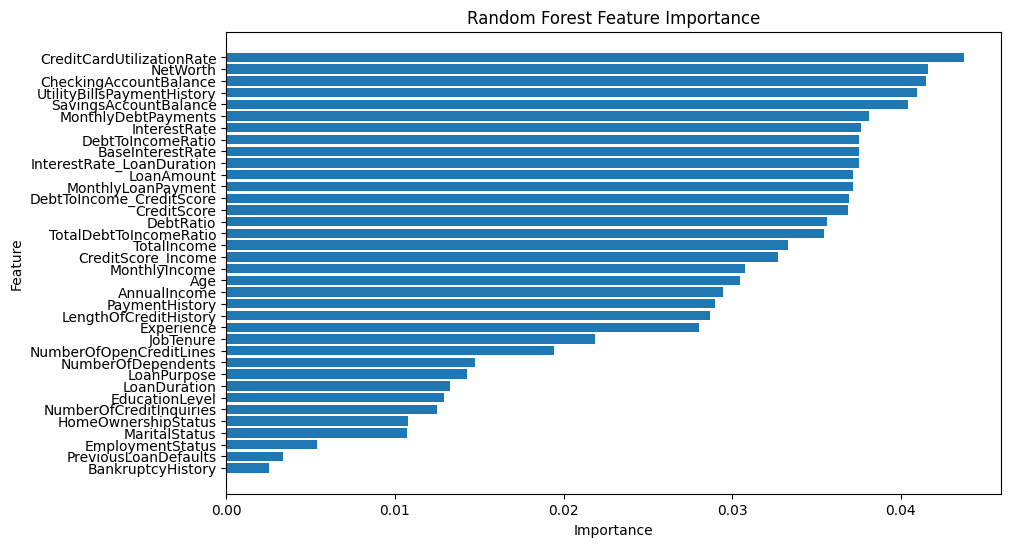

In [31]:
# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()